<a href="https://colab.research.google.com/github/rodrigoviana-ds/Projetos/blob/main/ModeloFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importação de Bibliotecas**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
caminho = '/content/insurance.csv'
dados = pd.read_csv(caminho)

#**OBJETIVO INICIAL:** Construir um Modelo para a previsão de Custos Médicos de um paciente.

In [3]:
!pip install pycaret

     |████████████████████████████████| 266kB 7.8MB/s 
     |████████████████████████████████| 102kB 4.7MB/s 
     |████████████████████████████████| 215kB 12.4MB/s 
     |████████████████████████████████| 2.0MB 19.2MB/s 
     |████████████████████████████████| 6.8MB 27.9MB/s 
     |████████████████████████████████| 1.7MB 44.3MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 61kB 6.0MB/s 
     |████████████████████████████████| 245kB 49.4MB/s 
     |████████████████████████████████| 14.2MB 267kB/s 
     |████████████████████████████████| 81kB 3.9MB/s 
     |████████████████████████████████| 276kB 54.7MB/s 
     |████████████████████████████████| 81kB 6.4MB/s 
     |████████████████████████████████| 1.1MB 28.6MB/s 
     |████████████████████████████████| 81kB 6.5MB/s 
     |████████████████████████████████| 61kB 4.0MB/s 
   

In [4]:
from pycaret.regression import *

In [5]:
?setup

In [6]:
regressao = setup(data = dados,
                  target = 'charges',
                  normalize = True,
                  n_jobs = 2)

,Description,Value
0,session_id,1039
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 14)"


In [7]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [8]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1783.9095,8.877999e+06,2979.5972,0.9325,0.3916,0.3289
1,2380.1859,1.857010e+07,4309.3041,0.8596,0.3860,0.2436
2,2953.8584,2.785605e+07,5277.8829,0.8230,0.5144,0.3691
3,2592.1084,2.412381e+07,4911.5998,0.8055,0.4735,0.3079
4,2788.4845,2.449742e+07,4949.4870,0.8084,0.4404,0.3565
5,2970.0578,2.851115e+07,5339.5829,0.7523,0.5829,0.4163
6,2149.6465,1.223850e+07,3498.3574,0.9218,0.4049,0.2865
7,2533.5461,2.507530e+07,5007.5246,0.7812,0.5418,0.2833
8,3000.8647,2.868512e+07,5355.8492,0.7609,0.4526,0.2565
9,2745.4031,2.497422e+07,4997.4209,0.8344,0.4069,0.2506


In [9]:
rf_tunado = tune_model(rf, optimize = 'RMSLE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1601.4134,5.645682e+06,2376.0643,0.9571,0.3400,0.2881
1,2202.7325,1.591830e+07,3989.7739,0.8796,0.3598,0.2602
2,2490.3938,2.251202e+07,4744.6834,0.8569,0.4488,0.2971
3,2412.5668,1.992979e+07,4464.2795,0.8393,0.4487,0.3090
4,2697.2541,2.162398e+07,4650.1596,0.8308,0.4180,0.3496
5,2861.3322,2.597653e+07,5096.7176,0.7744,0.5146,0.3253
6,2077.6929,1.063721e+07,3261.4739,0.9320,0.3629,0.2570
7,2448.6429,2.149035e+07,4635.7689,0.8125,0.4970,0.2717
8,3000.3665,2.675506e+07,5172.5298,0.7770,0.4582,0.2839
9,2727.6383,2.465492e+07,4965.3721,0.8365,0.3801,0.2208


In [10]:
#Comparando os Modelos implementados, ordenando-os pelo 'RMSLE'

melhores = compare_models(sort = 'RMSLE', n_select = 5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2445.7169,1.993816e+07,4389.7099,0.8463,0.4226,0.2876,0.088
par,Passive Aggressive Regressor,3408.8028,4.886021e+07,6946.9540,0.6311,0.4416,0.1819,0.032
huber,Huber Regressor,3294.8072,4.290377e+07,6506.4012,0.6734,0.4418,0.2109,0.040
rf,Random Forest Regressor,2589.8065,2.234097e+07,4662.6606,0.8280,0.4595,0.3099,0.552
et,Extra Trees Regressor,2684.5780,2.545712e+07,5010.6902,0.8050,0.4737,0.3180,0.525
lightgbm,Light Gradient Boosting Machine,2797.6308,2.245272e+07,4662.7115,0.8266,0.5228,0.3536,0.709
llar,Lasso Least Angle Regression,3987.8708,3.483708e+07,5864.8181,0.7341,0.5382,0.4071,0.017
dt,Decision Tree Regressor,3264.1750,4.355969e+07,6554.5910,0.6668,0.5396,0.3862,0.016
ridge,Ridge Regression,4000.4565,3.482824e+07,5864.3165,0.7342,0.5508,0.4095,0.014
br,Bayesian Ridge,3997.1216,3.483034e+07,5864.4798,0.7341,0.5526,0.4087,0.018


In [11]:
melhores_tunados = []

for i in range(len(melhores)):
    melhores_tunados.append(tune_model(melhores[i], optimize = 'RMSLE'))

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2325.3601,1.131888e+07,3364.3536,0.9140,0.3545,0.3311
1,2451.2648,1.741534e+07,4173.1686,0.8683,0.3715,0.2818
2,3205.1955,2.881123e+07,5367.6089,0.8169,0.5086,0.3853
3,2778.4334,2.191791e+07,4681.6571,0.8233,0.4419,0.3330
4,2670.5994,2.299605e+07,4795.4196,0.8201,0.3960,0.3268
5,2996.7725,2.616144e+07,5114.8258,0.7727,0.4959,0.3149
6,2370.4087,1.271169e+07,3565.3458,0.9187,0.3537,0.2679
7,2562.0087,2.134273e+07,4619.8190,0.8137,0.4503,0.2789
8,3352.0174,2.976321e+07,5455.5667,0.7520,0.4763,0.3213
9,2844.2469,2.315082e+07,4811.5295,0.8465,0.3788,0.2518


In [12]:
modelo_combinado = blend_models(melhores_tunados)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2043.7378,9.512147e+06,3084.1768,0.9277,0.2872,0.2407
1,2492.4704,2.098105e+07,4580.5071,0.8414,0.3230,0.1998
2,3210.7322,3.385366e+07,5818.3899,0.7849,0.4520,0.2837
3,2673.9068,2.430160e+07,4929.6648,0.8040,0.4252,0.2369
4,2733.4196,2.744517e+07,5238.8138,0.7853,0.3625,0.2540
5,2992.3742,2.982833e+07,5461.5315,0.7409,0.4922,0.2524
6,2419.2170,1.569132e+07,3961.2277,0.8997,0.3110,0.1906
7,2513.8038,2.413719e+07,4912.9616,0.7894,0.4609,0.2098
8,3346.0494,3.457419e+07,5879.9819,0.7119,0.4513,0.2321
9,3145.6402,2.930098e+07,5413.0380,0.8057,0.3586,0.1887


In [13]:
# Performance nos dados de validação

pred = predict_model(modelo_combinado)
pred

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,3170.0359,3.218095e+07,5672.8254,0.8141,0.4048,0.2208


,age,bmi,sex_male,children_0,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges,Label
0,1.770237,0.105460,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,47291.054688,37292.205779
1,-0.139008,0.561064,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,40182.246094,33478.799922
2,1.487386,0.399976,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13919.823242,15262.353706
3,0.355981,-0.512860,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7626.993164,9322.874363
4,1.275247,-0.272854,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,27218.437500,29644.491501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,1.558099,0.932870,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,48517.562500,40884.378742
398,0.709545,0.203090,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,11552.904297,10864.491801
399,0.497407,-0.423366,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8233.097656,8593.380676
400,0.497407,1.582106,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8733.229492,9787.250430


In [14]:
pred['Label']

0      37292.205779
1      33478.799922
2      15262.353706
3       9322.874363
4      29644.491501
           ...     
397    40884.378742
398    10864.491801
399     8593.380676
400     9787.250430
401    13186.475596
Name: Label, Length: 402, dtype: float64

In [15]:
evaluate_model(modelo_combinado)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [16]:
# Utilizando o modelo escolhido nos dados todos para gerar o modelo final
modelo_final = finalize_model(modelo_combinado)

In [17]:
predict_model(modelo_final)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,2622.9764,2.201568e+07,4692.0875,0.8728,0.3127,0.1853


,age,bmi,sex_male,children_0,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges,Label
0,1.770237,0.105460,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,47291.054688,42106.788500
1,-0.139008,0.561064,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,40182.246094,36543.297609
2,1.487386,0.399976,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13919.823242,14655.449866
3,0.355981,-0.512860,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7626.993164,8523.430802
4,1.275247,-0.272854,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,27218.437500,31543.499609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,1.558099,0.932870,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,48517.562500,43791.428826
398,0.709545,0.203090,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,11552.904297,11054.054571
399,0.497407,-0.423366,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8233.097656,8833.159388
400,0.497407,1.582106,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8733.229492,9968.961915


In [18]:
#Salvando o Modelo

save_model(modelo_final, 'Melhor Modelo para Custos')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                                                                   ccp_alpha=0.0,
                                                                   criterion='mse',
                                                                   max_depth=9,
                                                                   

---

In [19]:
#Deplay Básico

def CustoSeguro(age, sex, bmi, children, smoker, region):
    dados0 = {'age': [age], 'sex': [sex], 'bmi': [bmi], 'children': [children], 'smoker': [smoker], 'region': [region]}
    dados = pd.DataFrame(dados0)

    modelo = load_model('Melhor Modelo para Custos')

    pred = float(predict_model(modelo, data = dados)['Label'].round(2))
    valor = round(1.8*pred, 2)
    
    print(' ')
    print('Idade: {}'.format(age))
    print('Sexo: {}'.format(sex))
    print('IMC: {}'.format(bmi))
    print('Crianças: {}'.format(children))
    print('Fumante: {}'.format(smoker))
    print('Região: {}'.format(region))
    print(' ')
    print('Custo do Seguro: ${}'.format(pred))
    print('Valor de Venda: ${}'.format(valor))

In [20]:
CustoSeguro(age = 34, sex = 'male', bmi = 33, children = 0, smoker =  'yes', region = 'southwest')

Transformation Pipeline and Model Successfully Loaded
 
Idade: 34
Sexo: male
IMC: 33
Crianças: 0
Fumante: yes
Região: southwest
 
Custo do Seguro: $34332.84
Valor de Venda: $61799.11


In [21]:
CustoSeguro(30, 'female', 25, 0, 'no', 'southwest')

Transformation Pipeline and Model Successfully Loaded
 
Idade: 30
Sexo: female
IMC: 25
Crianças: 0
Fumante: no
Região: southwest
 
Custo do Seguro: $3907.77
Valor de Venda: $7033.99


#**OBJETIVO COMPLEMENTAR:** Modelo de previsão para fraudadores da variável 'fumante'.

In [22]:
from pycaret.classification import *

In [23]:
class_setup = setup(data = dados,
                    target = 'smoker',
                    normalize = True, 
                    ignore_low_variance = True,
                    remove_multicollinearity = True, 
                    multicollinearity_threshold = 0.95,
                    n_jobs = 2)

,Description,Value
0,session_id,5245
1,Target,smoker
2,Target Type,Binary
3,Label Encoded,"no: 0, yes: 1"
4,Original Data,"(1338, 7)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


In [24]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [25]:
todos = compare_models(n_select = 18, turbo = False)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9690,0.9924,0.9595,0.9013,0.9287,0.9090,0.9103,0.155
gbc,Gradient Boosting Classifier,0.9648,0.9890,0.9447,0.8958,0.9187,0.8963,0.8975,0.147
rbfsvm,SVM - Radial Kernel,0.9605,0.9822,1.0000,0.8474,0.9160,0.8906,0.8969,0.054
dt,Decision Tree Classifier,0.9530,0.9261,0.8792,0.8995,0.8871,0.8575,0.8592,0.019
lr,Logistic Regression,0.9519,0.9865,0.8937,0.8849,0.8872,0.8567,0.8583,0.028
ada,Ada Boost Classifier,0.9509,0.9866,0.8995,0.8753,0.8852,0.8541,0.8558,0.123
rf,Random Forest Classifier,0.9498,0.9873,0.9142,0.8596,0.8855,0.8535,0.8545,0.521
mlp,MLP Classifier,0.9497,0.9859,0.8937,0.8743,0.8825,0.8506,0.8518,1.753
svm,SVM - Linear Kernel,0.9487,0.0000,0.9142,0.8628,0.8837,0.8511,0.8550,0.019
gpc,Gaussian Process Classifier,0.9391,0.9842,0.8426,0.8678,0.8527,0.8145,0.8162,0.858


In [26]:
?compare_models

In [27]:
top7_tunados = [tune_model(i) for i in todos[:7]]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9574,0.9926,1.0000,0.8333,0.9091,0.8816,0.8879
1,0.9787,0.9966,0.9500,0.9500,0.9500,0.9365,0.9365
2,0.9681,0.9679,0.9500,0.9048,0.9268,0.9064,0.9069
3,0.9681,0.9926,1.0000,0.8696,0.9302,0.9097,0.9134
4,0.9787,0.9993,1.0000,0.9091,0.9524,0.9387,0.9405
5,0.9574,0.9385,0.9000,0.9000,0.9000,0.8730,0.8730
6,0.9462,0.9851,1.0000,0.7917,0.8837,0.8494,0.8592
7,0.9892,0.9979,1.0000,0.9500,0.9744,0.9676,0.9681
8,0.9677,0.9925,1.0000,0.8696,0.9302,0.9094,0.9131
9,0.9785,0.9884,1.0000,0.9091,0.9524,0.9385,0.9403


In [28]:
top7_tunados

[LGBMClassifier(bagging_fraction=0.9, bagging_freq=6, boosting_type='gbdt',
                class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
                importance_type='split', learning_rate=0.2, max_depth=-1,
                min_child_samples=46, min_child_weight=0.001, min_split_gain=0.1,
                n_estimators=90, n_jobs=2, num_leaves=100, objective=None,
                random_state=5245, reg_alpha=0.005, reg_lambda=0.0005,
                silent=True, subsample=1.0, subsample_for_bin=200000,
                subsample_freq=0),
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.2, loss='deviance', max_depth=3,
                            max_features='log2', max_leaf_nodes=None,
                            min_impurity_decrease=0.05, min_impurity_split=None,
                            min_samples_leaf=2, min_samples_split=4,
                            min_weight_fraction_leaf=0.0, n_e

In [29]:
results = pd.DataFrame()

In [30]:
for i in range(len(top7_tunados)):
    ccc = predict_model(top7_tunados[i])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9652,0.9939,0.9605,0.869,0.9125,0.8908,0.8926


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9577,0.9901,0.9342,0.8554,0.8931,0.8668,0.8681


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Radial Kernel,0.9552,0.9811,1.0,0.8085,0.8941,0.8661,0.874


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9602,0.9835,0.9868,0.8333,0.9036,0.8788,0.8837


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9602,0.9839,1.0,0.8261,0.9048,0.8799,0.8863


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.9652,0.9888,0.9605,0.869,0.9125,0.8908,0.8926


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9577,0.9924,0.9868,0.8242,0.8982,0.8718,0.8774


In [31]:
# Os sete melhores modelos soltam probabilidades. Vamos fazer combinação 'soft'

combinacao_soft = blend_models(top7_tunados, method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9574,0.9892,1.000,0.8333,0.9091,0.8816,0.8879
1,0.9894,0.9966,1.000,0.9524,0.9756,0.9688,0.9693
2,0.9681,0.9980,0.950,0.9048,0.9268,0.9064,0.9069
3,0.9681,0.9905,1.000,0.8696,0.9302,0.9097,0.9134
4,0.9787,0.9939,1.000,0.9091,0.9524,0.9387,0.9405
5,0.9574,0.9845,0.900,0.9000,0.9000,0.8730,0.8730
6,0.9462,0.9872,1.000,0.7917,0.8837,0.8494,0.8592
7,0.9892,0.9950,1.000,0.9500,0.9744,0.9676,0.9681
8,0.9677,0.9932,1.000,0.8696,0.9302,0.9094,0.9131
9,0.9785,0.9849,1.000,0.9091,0.9524,0.9385,0.9403


In [32]:
combinacao_hard = blend_models(top7_tunados, method = 'hard')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9574,0.0,1.000,0.8333,0.9091,0.8816,0.8879
1,0.9894,0.0,1.000,0.9524,0.9756,0.9688,0.9693
2,0.9681,0.0,0.950,0.9048,0.9268,0.9064,0.9069
3,0.9681,0.0,1.000,0.8696,0.9302,0.9097,0.9134
4,0.9787,0.0,1.000,0.9091,0.9524,0.9387,0.9405
5,0.9468,0.0,0.900,0.8571,0.8780,0.8441,0.8445
6,0.9355,0.0,1.000,0.7600,0.8636,0.8224,0.8357
7,0.9892,0.0,1.000,0.9500,0.9744,0.9676,0.9681
8,0.9677,0.0,1.000,0.8696,0.9302,0.9094,0.9131
9,0.9785,0.0,1.000,0.9091,0.9524,0.9385,0.9403


Tanto as combinações 'hard' quanto 'soft' tiveram performances superiores a qualquer modelo individual. Por tanto, para modelo de produção, escolheremos a combinação 'soft', pois a 'hard' não solta probabilidades da variável resposta.



In [33]:
preds = predict_model(combinacao_soft, data = dados)

In [34]:
preds.sample(20).sort_values(by = 'Score')

,age,sex,bmi,children,smoker,region,charges,Label,Score
491,61,female,25.080,0,no,southeast,24513.09126,yes,0.7404
58,53,female,22.880,1,yes,southeast,23244.79020,yes,0.7462
340,24,female,27.600,0,no,southwest,18955.22017,yes,0.8131
330,61,female,36.385,1,yes,northeast,48517.56315,yes,0.9036
1129,19,female,18.600,0,no,southwest,1728.89700,no,0.9143
580,59,male,25.460,1,no,northeast,12913.99240,no,0.9277
918,61,female,28.200,0,no,southwest,13041.92100,no,0.9335
1242,22,female,21.280,3,no,northwest,4296.27120,no,0.9340
769,38,female,19.475,2,no,northwest,6933.24225,no,0.9413
924,43,male,23.200,0,no,southwest,6250.43500,no,0.9455


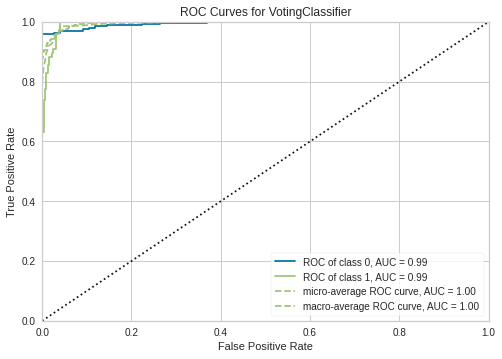

In [35]:
plot_model(combinacao_soft)

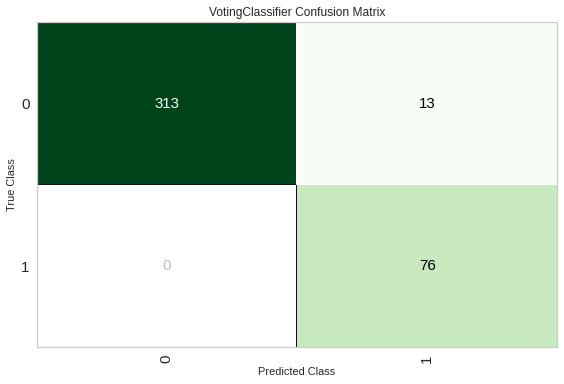

In [36]:
plot_model(combinacao_soft, plot = 'confusion_matrix')

In [37]:
pred = predict_model(combinacao_soft)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9677,0.9945,1.0,0.8539,0.9212,0.901,0.9055


#**Utilização do Modelo para identificar possíveis fraudadores**

In [46]:
pred = predict_model(combinacao_soft, data = dados)

Selecionar os clientes em que a resposta observada é **não fumante**, mas que o modelo indica que **é fumante**. 

O resultado é ordenado pelo Score, pois quanto mais alto, maior a probabilidade ser fumante e, portanto, maior o risco de ser um fraudador.

In [47]:
possiveis_fraudes = pred[(pred['Label'] == 'yes') & (pred['smoker'] == 'no')].sort_values(by = 'Score', ascending = False)
possiveis_fraudes

,age,sex,bmi,children,smoker,region,charges,Label,Score
340,24,female,27.600,0,no,southwest,18955.22017,yes,0.8131
1142,52,female,24.860,0,no,southeast,27117.99378,yes,0.7827
520,50,female,27.360,0,no,northeast,25656.57526,yes,0.7724
980,54,male,25.460,1,no,northeast,25517.11363,yes,0.7493
491,61,female,25.080,0,no,southeast,24513.09126,yes,0.7404
62,64,male,24.700,1,no,northwest,30166.61817,yes,0.7333
688,47,female,24.100,1,no,southwest,26236.57997,yes,0.7312
355,46,male,27.600,0,no,southwest,24603.04837,yes,0.7066
159,50,female,27.830,3,no,southeast,19749.38338,yes,0.7065
583,32,female,23.650,1,no,southeast,17626.23951,yes,0.7028


In [48]:
investigar = possiveis_fraudes[possiveis_fraudes['Score'] > 0.7]
investigar

,age,sex,bmi,children,smoker,region,charges,Label,Score
340,24,female,27.60,0,no,southwest,18955.22017,yes,0.8131
1142,52,female,24.86,0,no,southeast,27117.99378,yes,0.7827
520,50,female,27.36,0,no,northeast,25656.57526,yes,0.7724
980,54,male,25.46,1,no,northeast,25517.11363,yes,0.7493
491,61,female,25.08,0,no,southeast,24513.09126,yes,0.7404
62,64,male,24.70,1,no,northwest,30166.61817,yes,0.7333
688,47,female,24.10,1,no,southwest,26236.57997,yes,0.7312
355,46,male,27.60,0,no,southwest,24603.04837,yes,0.7066
159,50,female,27.83,3,no,southeast,19749.38338,yes,0.7065
583,32,female,23.65,1,no,southeast,17626.23951,yes,0.7028


In [49]:
modelo_final = finalize_model(combinacao_soft)

In [50]:
# Salvando o modelo

save_model(modelo_final, 'meu-melhor-modelo-para-smoker')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='smoker',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                                                                       max_features=1.0,
                                                                       max_leaf_nodes=None,
                                                                       max_samples=None,
    

In [43]:
# Deploy Básico

def DetectorDeFumante(age, sex, bmi, children, region, charges):
    dados0 = {'age': [age], 'sex': [sex], 'bmi': [bmi], 'children': [children], 'region': [region], 'charges': [charges]}
    dados = pd.DataFrame(dados0)

    modelo = load_model('meu-melhor-modelo-para-smoker')
 
    pred = predict_model(modelo, data = dados)
    resp = 'NÃO' if pred['Label'][0] == 'no' else 'SIM' 
    prob = pred['Score'][0] 


    print(' ')
    print('Idade: {}'.format(age))
    print('Sexo: {}'.format(sex))
    print('IMC: {}'.format(bmi))
    print('Crianças: {}'.format(children))
    print('Região: {}'.format(region))
    print('Custos: {}'.format(charges))
    print(' ')
    print('É fumante: {}, com probabilidade {:.2f}%'.format(resp, 100*prob))

In [51]:
DetectorDeFumante(age = 30, sex = 'male', bmi = 25, children = 0, region = 'southwest', charges = 20000)

Transformation Pipeline and Model Successfully Loaded
 
Idade: 30
Sexo: male
IMC: 25
Crianças: 0
Região: southwest
Custos: 20000
 
É fumante: SIM, com probabilidade 86.01%


In [52]:
DetectorDeFumante(age = 30, 
                  sex = 'male', 
                  bmi = 25, 
                  children = 0, 
                  region = 'southwest', 
                  charges = 20000)

Transformation Pipeline and Model Successfully Loaded
 
Idade: 30
Sexo: male
IMC: 25
Crianças: 0
Região: southwest
Custos: 20000
 
É fumante: SIM, com probabilidade 86.01%
